In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import mytk # My Toolkit

In [2]:
df = acquire.wrangle_superstore()

df.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,region_name,customer_name,category,sub_category,product_name
0,FUR-BO-10001798,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,South,Claire Gute,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,South,Claire Gute,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back"
2,FUR-TA-10000577,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,South,Sean O'Donnell,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
3,OFF-ST-10000760,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,South,Sean O'Donnell,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
4,OFF-PA-10002365,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,South,Andrew Allen,Office Supplies,Paper,Xerox 1967


In [3]:
mytk.col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
product_id,object,0,0.0,0,1112,622
customer_id,object,0,0.0,0,525,1209
order_id,object,0,0.0,0,841,893
order_date,datetime64[ns],0,0.0,0,570,1164
ship_date,datetime64[ns],0,0.0,0,608,1126
ship_mode,object,0,0.0,0,4,1730
segment,object,0,0.0,0,3,1731
city,object,0,0.0,0,247,1487
state,object,0,0.0,0,41,1693
postal_code,float64,0,0.0,0,306,1428


In [4]:
mytk.get_gotchas(df)

{'possible_ids': [],
 'possible_bools': [],
 'probable_categories': ['ship_mode', 'segment', 'region_name', 'category']}

In [5]:
df.order_date = pd.to_datetime(df.order_date)
df.ship_date = pd.to_datetime(df.ship_date)

In [6]:
mytk.col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
product_id,object,0,0.0,0,1112,622
customer_id,object,0,0.0,0,525,1209
order_id,object,0,0.0,0,841,893
order_date,datetime64[ns],0,0.0,0,570,1164
ship_date,datetime64[ns],0,0.0,0,608,1126
ship_mode,object,0,0.0,0,4,1730
segment,object,0,0.0,0,3,1731
city,object,0,0.0,0,247,1487
state,object,0,0.0,0,41,1693
postal_code,float64,0,0.0,0,306,1428


In [10]:
def get_gotchas(df, cat_threshold=10):
    """Given a df, tries to identify potential problems in the data that might need addressed."""
    out = {
        'possible_ids': [],
        'possible_bools': [],
        'probable_categories': [],
        'probably_dont_plot': [],
        }
    summary = mytk.col_summary(df)
    for name, row in summary.iterrows():
        if len(df) - row.loc['n_unique'] <= 1:
            out['possible_ids'].append(name)
        if row.loc['n_unique'] in [1,2]:
            out['possible_bools'].append(name)
        if row.loc['n_unique'] < cat_threshold:
            out['probable_categories'].append(name)
        if row.loc['dtype'] in ['category','object'] and row.loc['n_unique'] > cat_threshold:
            out['probably_dont_plot'].append(name)
    return out

get_gotchas(df)

{'possible_ids': [],
 'possible_bools': [],
 'probable_categories': ['ship_mode', 'segment', 'region_name', 'category'],
 'probably_dont_plot': ['product_id',
  'customer_id',
  'order_id',
  'city',
  'state',
  'customer_name',
  'sub_category',
  'product_name']}

In [11]:
dropme = [
    'product_id',
  'customer_id',
  'order_id',
  'city',
  'customer_name',
  'product_name']

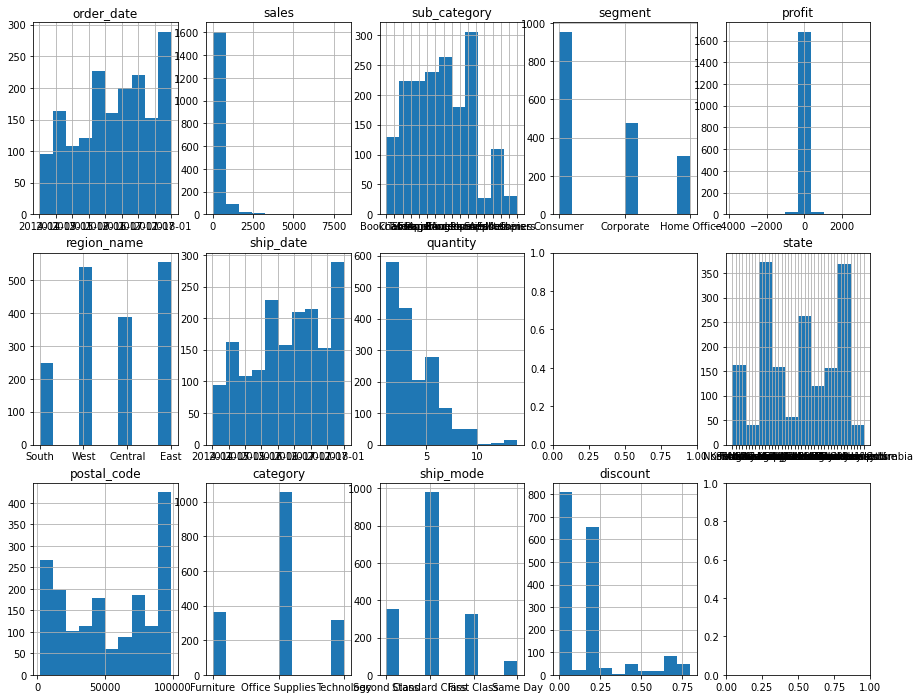

In [12]:
mytk.all_the_hist(df.drop(columns=dropme))

In [14]:
df['days_to_ship'] = df.ship_date - df.order_date

In [21]:
df.days_to_ship.dt.days

0       3
1       3
2       7
3       7
4       5
       ..
1729    5
1730    1
1731    1
1732    1
1733    5
Name: days_to_ship, Length: 1734, dtype: int64

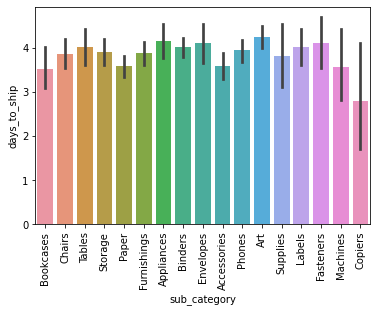

In [31]:
ax = sns.barplot(data=df, x='sub_category', y=df.days_to_ship.dt.days).tick_params(axis='x', rotation=90)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
    